In [1]:
import math
import numpy as np
import scipy.special as scp
import matplotlib.pyplot as plt

# Math 387 Honours Numerical Analysis Lab Assignment 3
## Shenshun Yao 260709204

### Part 1. 
For Chebyshev Interpolation, the function
$$\lambda_n(x)=\sum_{k=0}^n |\phi_{n,k}(x)|$$
take the maximum at $1$ and $-1$, we need to compute $\phi_{n, k} \ (x)$  in order to find the Lebesgue Constant.

First we need to create Chebyshev Nodes in the interval (-1,1);

In [2]:
def ChebyshevNodes(n):
    k = np.array(range(1,n+1))
    return np.cos((2*k-1)*np.pi/(2*n))

Then we evaluate the Lagrange coefficients;

In [3]:
def b( k, x, nodes ):
    x_k = nodes[k]
    v = 1
    for x_i in nodes:
        if x_i != x_k:
            v *= (x-x_i)/(x_k-x_i)
    return v

And now we can already construct the Lebesgue Constant $||L_n||$ against $n$, note that $\lambda_n(x)=\sum_{k=0}^n |\phi_{n,k}(x)|$ attains its maximum at $1$ and $-1$.

In [4]:
def Ln(n):
    nodes = ChebyshevNodes(n)
    L = 0
    for i in range(n):
        L += np.abs(b(i, -1, nodes))
    return L

Moreover we plot the Lebesgue Constants for Chebyshev Interpolation and show the property i.e. there exists a constant $C$ s.t.
$$\|L_n\|=C\log n.$$

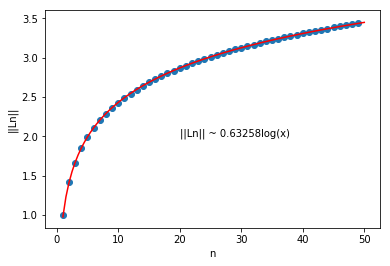

In [5]:
x = np.array(range(1,50))
y = []
for i in x:
    y.append(Ln(i))

fit = np.polyfit(np.log(x), y, deg=1)
xdata = np.linspace(1, 50, 100)
ydata = fit[1] + fit[0]*np.log(xdata)
plt.plot(xdata, ydata, 'r')
plt.scatter(x, y)
plt.text(20,2,"||Ln|| ~ "+str(round(fit[0], 5))+"log(x)")
plt.xlabel("n")
plt.ylabel("||Ln||")
plt.show()

Therefore, $C \approx 0.633$.

### Part 2
For interpolation with equidistant nodes, the function $\lambda_n$ as above achieves its maximum in the intervals $(x_0,x_1)$ and $(x_{n−1},x_n)$. So in order to compute the Lebesgue constant $‖L_n‖$, we need to locate one of the global maximums. Implement the Newton-Raphson method and apply it to the derivative $\lambda_n'$ to complete this task. One possible initial guess is to start at the midpoint of the interval $(x_0,x_1)$. Note that the method converges to the desired zero of $\lambda_n'$. we will Plot the graph $||L_n||$ against $n$, and experimentally confirm the law 
$$||L_n||\sim2^n.$$

First, as same as Part 1 we need to create equidistantnodes in the interval (-1,1);

In [6]:
def equinodes(n):
    return np.linspace(-1,1,n)

Then we compute the derivative of the Lagrange coefficirnts;
$$\phi_{n, k} \ (x) = \sum_{i = 0, i \neq j}^{k}\Big[\frac{1}{x_j-x_i} \prod_{m = 0, m \neq i,j}^{k} \frac{x-x_m}{x_j-x_m}\Big]$$

In [7]:
def db(k, x, nodes):
    den = 1
    xj = []
    for i in range(len(nodes)):
        if i!=k:
            xj.append(nodes[i])
            den = den*(nodes[k]-nodes[i])
    num = 0
    for j in xj:
        product = 1
        for m in xj:
            product = product * (x-m)
        product = product/(x-j)
        num = num + product
    return num/den

Here we imply Secant Method for root finding, the method converges to the desired zero of $\lambda_n'$.

In [8]:
#Secant method for root finding
def secantApprox(nodes, x0, e):
    while np.abs(dlgfunc(x0, nodes)) > e:
        x0 = x0 - dlgfunc(x0, nodes)/((dlgfunc(x0+e**2, nodes)-dlgfunc(x0-e**2, nodes))/(2*e**2))
    return x0

Compute the sum of the Lagrange polynomials at x and its derivative;

In [9]:
def lgfunc(x, nodes):
    lf = 0
    for i in range(len(nodes)):
        lf = lf+np.abs(b(i, x, nodes))
    return lf

def dlgfunc(x, nodes):
    dlf = 0
    for i in range(len(nodes)):
        dlf = dlf+(b(i,x,nodes)/np.abs(b(i,x,nodes)))*db(i, x, nodes)
    return dlf

Now we do the approximation for the Lebesgue constant of Lagrange interpolation with equidistant nodes;

In [10]:
def Ln(n): 
    nodes = equinodes(n)
    localmax = secantApprox(nodes, (4/5)*nodes[0] +(1/5)*nodes[1], 0.00002)
    return lgfunc(localmax, nodes)

Moreover we plot the Lebesgue Constants of Lagrange Interpolation with equidistant nodes and confirm the law 

$$||L_n||\sim2^n.$$

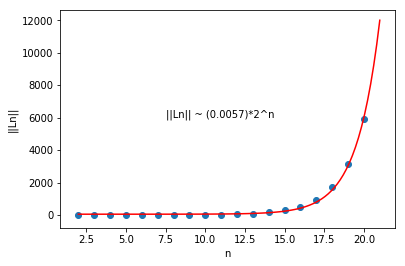

In [11]:
x = np.array(range(2, 21))
y = []
for i in x:
    y.append(Ln(i))
    
fit = np.polyfit(2**x, y, deg=1)  
xdata = np.linspace(2, 21, 100)
ydata = fit[1] + fit[0]*(2**xdata)
plt.plot(xdata, ydata,'r')
plt.scatter(x, y)
plt.text(7.5,6000,"||Ln|| ~ ("+str(round(fit[0], 5))+")*2^n")
plt.xlabel("n")
plt.ylabel("||Ln||")
plt.show()

### Part 3
Now we compute the Lebesgue constants for Chebyshev truncation i.e. we need to evaluate the integrals 

$$\|S_n\| = \int_0^\pi \Big|\frac{\sin((n+\frac12)\theta)}{2\sin(\frac12\theta)}\Big| d\theta .$$

Plotting the graph (of a function) of $‖S_n‖$ against $n$, experimentally determine the constant $C$ in the assumed dependence $‖S_n‖=C\log⁡ n$

First we create the qudrature nodes for the $n$-th Chebyshev truncation;

In [12]:
def Quanodes(n):
    nodes = [0.00000002] #the first node should be very closed to 0
    k = 1
    node = k*np.pi/((n+(1/2))*5)
    
    while node < np.pi:
        nodes.append(node)
        k = k+1
        node = k*np.pi/((n+(1/2))*5)# here we choose that we have 5 nodes for each root
        
    nodes.append(np.pi)# the last node is pi
    return nodes

Now we compute the $n$-th Chebyshev Truncation at $\theta$ and the Lebesgue constants for Chebyshev truncation i.e. the integral above

In [13]:
def TrunCheby(n, theta):
     return np.abs(np.sin((n+1/2)*theta)/(2*np.sin(theta/2)))
        
def LbTrunCheby(n):
    nodes = Quanodes(n)
    intg = 0
    #we implement the composite trapezoidal rule now
    for i in range(0, len(nodes)-1):
        leftbound = TrunCheby(n, nodes[i])
        rightbound = TrunCheby(n, nodes[i+1])
        intg = intg+((leftbound+rightbound)/2)*(nodes[i+1]-nodes[i])
    return intg

We plot graph (of a function) of $‖S_n‖$ against $n$, experimentally determine the constant $C$ in the assumed dependence $‖S_n‖=C\log⁡ n$;

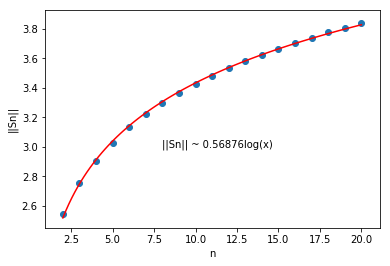

In [14]:
x = np.array(range(2, 21))
y = []
for i in x:
    y.append(LbTrunCheby(i))

fit = np.polyfit(np.log(x), y, deg=1)
xdata = np.linspace(2, 20, 100)
ydata = fit[1] + fit[0]*np.log(xdata)
plt.plot(xdata, ydata, 'r')
plt.scatter(x,y)
plt.text(8,3,"||Sn|| ~ "+str(round(fit[0], 5))+"log(x)")
plt.xlabel("n")
plt.ylabel("||Sn||")
plt.show()

Therefore, $C \approx 0.569$.

### Part 4
Compute the Lebesgue constants for Legendre truncation. 

First we need the $a_k$ which appears on our Theory Assignment 4:

$$ a_k = \frac{2k+1}{2} = k+0.5$$

In [15]:
def a(k):
    return k+1/2

Then we need to evaluate the Legendre Polynomial at x:

$$P_n(x) = 2^n \sum_{k=0}^{n} x^k \binom{n}{k} \binom{\frac{n+k-1}{2}}{n}$$

In [16]:
def lp(n, x):
    lb = 0
    for k in range(0, n+1):
        lb = lb+(x**k)*scp.binom(n,k)*scp.binom((n+k-1)/2,n)
    return lb*(2**n)

Now we can compute  Lebesgue constants for Legendre truncation:
$$\|S_n\| = \int_{-1}^1 \Big|\sum_{k=0}^na_kP_k(x)\Big| dx$$

In [17]:
def legfunc(n, x):
    lf = 0
    for k in range(0, n+1):
        lf = lf + a(k)*lp(k,x)
    return np.abs(lf)

def lclegfunc(n):
    nodes = np.linspace(-1,1,5*n)
    intg = 0
    for i in range(0, len(nodes)-1):
        leftbound = legfunc(n, nodes[i])
        rightbound = legfunc(n, nodes[i+1])
        intg = intg+((leftbound+rightbound)/2)*(nodes[i+1]-nodes[i])
    return intg

Plotting the graph (of a function) of $‖S_n‖$ against $n$, experimentally determine the constant $C$ in the assumed dependence $\|S_n\|=C\sqrt n.$

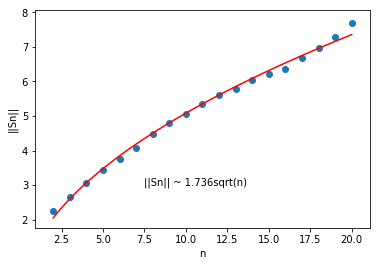

In [18]:
x = np.array(range(2, 21))
y = []
for i in x:
    y.append(lclegfunc(i))

fit = np.polyfit(np.sqrt(x), y, deg=1)
xdata = np.linspace(2, 20, 100)
ydata = fit[1] + fit[0]*np.sqrt(xdata)
plt.plot(xdata, ydata, 'r')
plt.scatter(x,y)
plt.text(7.5,3,"||Sn|| ~ "+str(round(fit[0], 3))+"sqrt(n)")
plt.xlabel("n")
plt.ylabel("||Sn||")
plt.show()

Therefore, $C=1.736$.

### Part 5
We want to show some evidence that for Newton-Cotes formulas, $||Q_n||$ gorws with $n$. Design and implement a procedure to compute the weights $\omega_k$, and therefore the ``Lebesgue constant'' $‖Q_n‖$ for the Newton-Cotes formula with $n+1$ nodes, for the interval, say $[0,1]$. This can be done by a quadrature rule for the integrals 

$$\|Q_n\| = \sum_{k=0}^n |\omega_k| = \sum_{k=0}^n \Big| \int_a^b\phi_{n,k}(x) dx\Big|.$$


First, we approximate the integral of $k$-th Lagrange coefficients with  composite trapezoidal rule to get the weights;

In [19]:
def Qb(k, nodes):
    intnodes = np.linspace(0,1,len(nodes)*2)
    int = 0
    for i in range(0, len(intnodes)-1):
        leftbound = b(k,intnodes[i],nodes)
        rightbound = b(k,intnodes[i+1],nodes)
        int = int+((leftbound+rightbound)/2)*(intnodes[i+1]-intnodes[i])
    return int

Then we sum up the weights to get $||Q_n||$;

In [20]:
def Q_n(n):
    nodes = np.linspace(0,1,n+1)
    Sum = 0
    for k in range(0, n+1):
        Sum = Sum+np.abs(Qb(k, nodes))
    return Sum

Plotting the graph (of a function) of $‖Q_n‖$ against $n$, make a guess on the functional dependence of $‖Q_n‖$ on $n$;

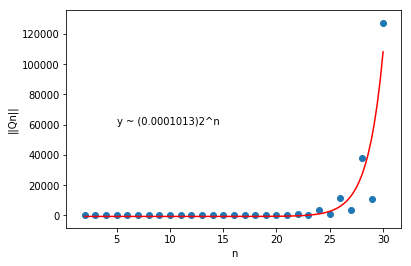

In [21]:
x = np.array(range(2, 31))
y = []
for i in x:
    y.append(Q_n(i))

fit = np.polyfit(2**x, y, deg=1)
xdata = np.linspace(2, 30, 100)
ydata = fit[1] + fit[0]*(2**xdata)
plt.plot(xdata, ydata, 'r')
plt.scatter(x,y)
plt.text(5,60000,"y ~ ("+str(round(fit[0], 7))+")2^n")
plt.xlabel("n")
plt.ylabel("||Qn||")
plt.show()

The guess on the functional dependence of $‖Q_n‖$ on $n$ is exponential.